# DATACHALLENGE

Pour ce datachallenge, nous aurons besoin des modules Python ci-dessous, il vous faut donc évidemment exécuter cette première cellule.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

Les différentes méthodes dont nous aurons besoins

### Pour importer les fichiers csv
pd.read_csv

### Pour créer nos echantillons de train et de test
from sklearn import model_selection.train_test_split

model_selection.train_test_split

### Trouver la meilleur valeur d'un paramètre
form sklearn import model_selection

model_selection.GridSearchCV

### Créer une répartition d'échantillon de test aléatoire
from sklearn import model_selection

model_selection.KFold

### Pour calculer une regression linéaire
from sklearn import linear_model

linear_model.LogisticRegression

### Pour faire une PCA
from sklearn import decomposition

decomposition.PCA

### Classificatuer gaussien
from sklearn.naive_bayes import GaussianNB

### Classificateur k-voisins
from sklearn import neighbors

neighbors.KNeighborsClassifier

### Regression logistique
from sklearn import linear_model

linear_model.LogisticRegression

### Regression logistique lasso
from sklearn import linear_model

linear_model.LogisticRegressionCV

### Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

### Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

### Bagged Tree
from sklearn.ensemble import BaggingRegressor

### Random forest regressor
from sklearn.ensemble import RandomForestRegressor

### Reseaux de neurones
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Activation

from tensorflow.keras.utils import plot_model

from tensorflow.keras.optimizers import SGD

# Importation des données

Nous allons importer toutes les données qui vont nous être utiles, même celles qui ne seront pas utiles avant la fin


In [2]:
XTrain_Path = "Xtrain_hgcGIrA.csv"
YTrain_Path = "Ytrain_yL5OjS4.csv"
XTest_Path = "Xtest.csv"

In [3]:
XTrain  =    pd.read_csv(XTrain_Path)
YTrain  =    pd.read_csv(YTrain_Path)["p0q0"]
XTest  =    pd.read_csv(XTest_Path)

In [4]:
XTrain.head()

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096


# Exemple de Découpage train / test

En apprentissage statistique, classiquement un prédicteur est ajusté sur une partie seulement des données et l'erreur de ce dernier est ensuite évaluée sur une autre partie des données disponibles. Ceci permet de ne pas utiliser les mêmes données pour ajuster et évaluer la qualité d'un prédicteur. Cette problématique est l'objet du prochain chapitre.

> En utilisant la fonction [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) de la librairie [`sklearn.model_selection`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection), on sélectionne aléatoirement 60% des observations pour l'échantillon d'apprentissage et on garde le reste pour l'échantillon de test. 

In [12]:
from sklearn import model_selection

XTrain_train,XTrain_test,YTrain_train, YTrain_test = model_selection.train_test_split(XTrain.to_numpy(), YTrain.to_numpy(), test_size=0.4, train_size=0.6, random_state=0, shuffle=True, stratify=None)

# Exemple de transformation des predictions en CSV

Il faut que l'on obtienne un fichier csv pour tester nos résultats, voici comment on procède

In [91]:
prediction = YTrain.to_numpy()
print(prediction)

df = pd.DataFrame(prediction, columns=['p0q0'])
df.to_csv("predictionExemple.csv")

[0.216 0.216 0.227 ... 0.139 0.117 0.416]


# Decision tree regressor avec pq

In [95]:
#Selections des colonnes
XTrain_ = XTrain[["p0q1","p0q2", "p0q3", "p1q0","p2q0","p3q0"]]

#Nan -> 0
XTrain_ = XTrain_.fillna(0)

#Découpage train/test
from sklearn import model_selection
XTrain_train,XTrain_test,YTrain_train, YTrain_test = model_selection.train_test_split(XTrain_.to_numpy(), YTrain.to_numpy(), test_size=0.4, train_size=0.6, random_state=0, shuffle=True, stratify=None)


#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor().fit(XTrain_.to_numpy(), YTrain.to_numpy())
prediction = DTR.predict(XTest_.to_numpy())


## Rendu première méthode

In [52]:
#selection des colonnes
XTrain_ = XTrain[["p0q1","p0q2", "p0q3", "p1q0","p2q0","p3q0"]]
XTrain_ = XTrain_.fillna(0)
XTest_ = XTest[["p0q1","p0q2", "p0q3", "p1q0","p2q0","p3q0"]]
XTest_ = XTrain_.fillna(0)

#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor().fit(XTrain_.to_numpy(), YTrain.to_numpy())
prediction = DTR.predict(XTest_.to_numpy())


df = pd.DataFrame(prediction, columns=['p0q0'], index = np.arange(1, prediction.size+1))
df.to_csv("prediction1.csv")


# Decision tree regressor avec pq + sens, train, heure, jour, composition

In [55]:
#transformation en float des colonnes date et hour
from datetime import datetime
XTrain_hd = XTrain[["hour","date", "way", "train", "composition"]]
XTrain_hd = XTrain_hd.fillna(method='ffill')
hour_f = np.zeros((XTrain_hd.shape[0]))
day_f = np.zeros((XTrain_hd.shape[0]))

for i in range(XTrain_hd.shape[0]):
    hour_f[i] = (datetime.strptime(XTrain_hd["hour"][i],'%H:%M:%S')-datetime.strptime('00:00:00','%H:%M:%S')).seconds
    day_f[i] = datetime.strptime(XTrain_hd["date"][i],"%Y-%m-%d").weekday()
    
#récupération des colonnes
XTrain_ = XTrain[["p1q0","p2q0","p3q0","p0q1","p0q2","p0q3"]]
XTrain_ = XTrain_.fillna(XTrain_.mean())

XTrain_["hour"]=hour_f
XTrain_["day"]=day_f
XTrain_["way"]=XTrain_hd["way"]
XTrain_["train"]=XTrain_hd["train"]
XTrain_["composition"]=XTrain_hd["composition"]






#même opération pour XTest

XTest_hd = XTest[["hour","date", "way", "train", "composition"]]
XTest_hd = XTest_hd.fillna(method='ffill')
hour_f = np.zeros((XTest_hd.shape[0]))
day_f = np.zeros((XTest_hd.shape[0]))

for i in range(XTest_hd.shape[0]):
    hour_f[i] = (datetime.strptime(XTest_hd["hour"][i],'%H:%M:%S')-datetime.strptime('00:00:00','%H:%M:%S')).seconds
    day_f[i] = datetime.strptime(XTest_hd["date"][i],"%Y-%m-%d").weekday()
    
#récupération des colonnes
XTest_ = XTest[["p1q0","p2q0","p3q0","p0q1","p0q2","p0q3"]]
XTest_ = XTest_.fillna(0)

XTest_["hour"]=hour_f
XTest_["day"]=day_f
XTest_["way"]=XTest_hd["way"]
XTest_["train"]=XTest_hd["train"]
XTest_["composition"]=XTest_hd["composition"]



In [51]:
#Calcul de modèle de décision tree regressor
#FAIRE DES TEST EN CHANGEANT LE CALCUL DE SCORE
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor().fit(XTrain_.to_numpy(), YTrain.to_numpy())
prediction = DTR.predict(XTest_.to_numpy())


df = pd.DataFrame(prediction, columns=['p0q0'], index = np.arange(1, prediction.size+1))
df.to_csv("prediction2.csv")



# Bagged Tree Regressor

{'mean_fit_time': array([ 0.52042961,  5.52087708, 10.43095031, 15.73000121, 20.91146379,
       27.25621433, 32.06793742, 35.6737422 , 34.99069366]), 'std_fit_time': array([0.06144129, 0.36334296, 0.36005403, 0.51026154, 0.62106897,
       1.14457825, 0.8667517 , 1.00410535, 2.11203338]), 'mean_score_time': array([0.00938063, 0.0254086 , 0.04323816, 0.05611434, 0.07573447,
       0.09616084, 0.10656362, 0.11298923, 0.09728808]), 'std_score_time': array([0.00765925, 0.00801315, 0.0060713 , 0.00783067, 0.00560849,
       0.00306039, 0.00620546, 0.01835284, 0.01169838]), 'param_n_estimators': masked_array(data=[1, 11, 21, 31, 41, 51, 61, 71, 81],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 1}, {'n_estimators': 11}, {'n_estimators': 21}, {'n_estimators': 31}, {'n_estimators': 41}, {'n_estimators': 51}, {'n_estimators': 61}, {'n_estimators': 71}, {'n_estim

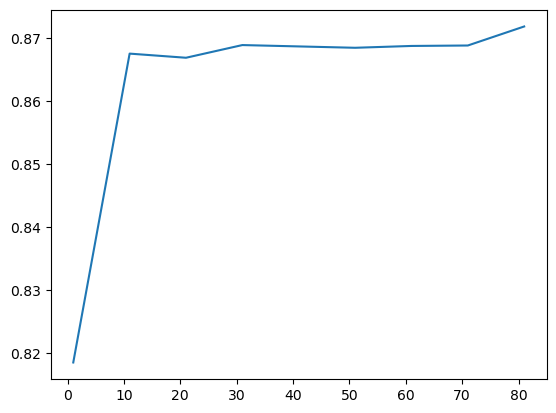

In [25]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV


n_estimators = np.arange(1,82,10)

tuned_parameters = {'n_estimators':n_estimators}

Cart_grid = GridSearchCV(
    BaggingRegressor(estimator = DecisionTreeRegressor(criterion = "friedman_mse")),
    tuned_parameters,
    n_jobs=-1
    )

Cart_grid.fit(XTrain_.to_numpy(), YTrain.to_numpy())

print(Cart_grid.cv_results_)
mean_score = Cart_grid.cv_results_['mean_test_score']
import matplotlib.pyplot as plt 
plt.plot(n_estimators, mean_score)




In [26]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bagTree = BaggingRegressor(estimator = DecisionTreeRegressor(criterion = "friedman_mse"), n_estimators=10)
bagTree.fit(XTrain_.to_numpy(), YTrain.to_numpy())

prediction = bagTree.predict(XTest_.to_numpy())


df = pd.DataFrame(prediction, columns=['p0q0'], index = np.arange(1, prediction.size+1))
df.to_csv("prediction_bgf10.csv")


# Linear regression

In [116]:
# Linear regression - Test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

XTrain_lr = XTrain[["p0q1","p0q2", "p0q3", "p1q0","p2q0","p3q0"]]
XTrain_lr = XTrain_.fillna(0)

XTrain_train,XTrain_test,YTrain_train, YTrain_test = train_test_split(XTrain_lr.to_numpy(), YTrain.to_numpy(), test_size=0.4, train_size=0.6, random_state=0, shuffle=True, stratify=None)

model = LinearRegression()
model.fit(XTrain_train, YTrain_train)
y_pred = model.predict(XTrain_test)
mse = mean_squared_error(YTrain_test, y_pred)
r2 = r2_score(YTrain_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Create a pipeline with polynomial features and Ridge Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(4), Ridge(alpha=0))  # Ridge with regularization strength alpha

# Train the model
model.fit(XTrain_train, YTrain_train)

# Make predictions
y_pred = model.predict(XTrain_test)

# Evaluate the model
mse = mean_squared_error(YTrain_test, y_pred)
r2 = r2_score(YTrain_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')




Mean Squared Error: 0.0034744957205418234
R-squared: 0.8597012016847498
Mean Squared Error: 0.0014263354759007922
R-squared: 0.9424051231146472


In [128]:
#Test degrée
mse_k = np.zeros(5)
r2_k = np.zeros(5)

for k in range(2,7):
    model = make_pipeline(PolynomialFeatures(k), Ridge(alpha=0)) 

# Train the model
    model.fit(XTrain_train, YTrain_train)

# Make predictions
    y_pred = model.predict(XTrain_test)

# Evaluate the model
    mse_k[k-2] = mean_squared_error(YTrain_test, y_pred)
    r2_k[k-2] = r2_score(YTrain_test, y_pred)
    

In [121]:
#Test alpha
mse_k = np.zeros(20)
r2_k = np.zeros(20)

for k in range(20):
    model = make_pipeline(PolynomialFeatures(4), Ridge(alpha=k*0.001)) 

# Train the model
    model.fit(XTrain_train, YTrain_train)

# Make predictions
    y_pred = model.predict(XTrain_test)

# Evaluate the model
    mse_k[k] = mean_squared_error(YTrain_test, y_pred)
    r2_k[k] = r2_score(YTrain_test, y_pred)
    

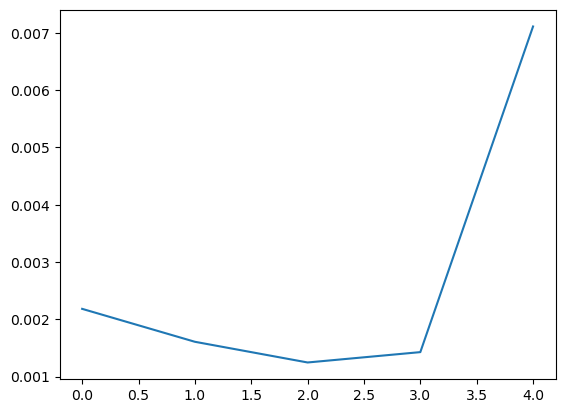

In [125]:
import matplotlib.pyplot as plt 
plt.plot(mse_k)

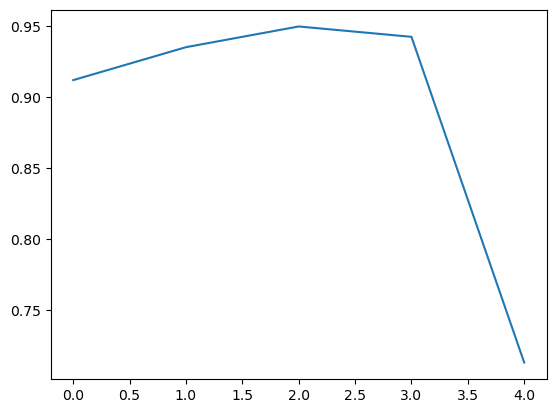

In [126]:
import matplotlib.pyplot as plt 
plt.plot(r2_k)

In [117]:
# Linear regression - Real Prediction
from sklearn.linear_model import LinearRegression

XTrain_lr = XTrain[["p0q1","p0q2", "p0q3", "p1q0","p2q0","p3q0"]]
XTrain_lr = XTrain_.fillna(0)
XTest_ = XTest[["p0q1","p0q2", "p0q3", "p1q0","p2q0","p3q0"]]
XTest_ = XTest_.fillna(0)


model = LinearRegression()
model.fit(XTrain_lr, YTrain)
y_pred = model.predict(XTest_)

df = pd.DataFrame(y_pred, columns=['p0q0'], index = np.arange(1, y_pred.size+1))
df.to_csv("prediction_lr.csv")

# Ridge - Real Prediction
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

XTrain_lr = XTrain[["p0q1","p0q2", "p0q3", "p1q0","p2q0","p3q0"]]
XTrain_lr = XTrain_.fillna(0)
XTest_ = XTest[["p0q1","p0q2", "p0q3", "p1q0","p2q0","p3q0"]]
XTest_ = XTest_.fillna(0)


model = make_pipeline(PolynomialFeatures(4), Ridge(alpha=0))
model.fit(XTrain_lr, YTrain)
y_pred = model.predict(XTest_)

df = pd.DataFrame(y_pred, columns=['p0q0'], index = np.arange(1, y_pred.size+1))
df.to_csv("prediction_r.csv")

# Réseau de Neurone

In [ ]:


def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(440, activation='relu'),
      layers.Dense(440, activation='relu'),
      layers.Dense(440, activation='relu'),
      layers.Dense(1, activation="linear")
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model



normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(np.array(np.array(XTrain_)))
print(normalizer.mean.numpy())



dnn_model = build_and_compile_model(normalizer)



history = dnn_model.fit(
    np.array(XTrain_),
    np.array(YTrain),
    validation_split=0.2,
    verbose=1, epochs=10000, batch_size=100)


dnn_model.predict(np.array(XTest_))


[[2.3476927e-01 2.5139275e-01 3.1686702e-01 2.0720035e-01 2.2216721e-01
  2.0984516e-01 2.6587627e+04 1.9232620e+00 0.0000000e+00 2.7067989e+01
  1.9996463e+00]]
Epoch 1/10000
249/249 [==============================] - 2s 5ms/step - loss: 0.0411 - val_loss: 0.0458
Epoch 2/10000
249/249 [==============================] - 1s 5ms/step - loss: 0.0218 - val_loss: 0.0411
Epoch 3/10000
249/249 [==============================] - 1s 5ms/step - loss: 0.0185 - val_loss: 0.0433
Epoch 4/10000
249/249 [==============================] - 1s 5ms/step - loss: 0.0165 - val_loss: 0.0428
Epoch 5/10000
249/249 [==============================] - 1s 5ms/step - loss: 0.0158 - val_loss: 0.0418
Epoch 6/10000
249/249 [==============================] - 1s 5ms/step - loss: 0.0148 - val_loss: 0.0398
Epoch 7/10000
249/249 [==============================] - 1s 5ms/step - loss: 0.0141 - val_loss: 0.0384
Epoch 8/10000
249/249 [==============================] - 1s 5ms/step - loss: 0.0136 - val_loss: 0.0382
Epoch 9/10000


In [63]:
prediction = dnn_model.predict(np.array(XTest_))


df = pd.DataFrame(prediction, columns=['p0q0'], index = np.arange(1, prediction.size+1))
df.to_csv("prediction_RN5_good.csv")

430/430 [==============================] - 1s 1ms/step


In [35]:
prediction

array([[0.25436968],
       [0.24707955],
       [0.25191575],
       ...,
       [0.13367376],
       [0.18309915],
       [0.14375857]], dtype=float32)